<a href="https://colab.research.google.com/github/lweatherford99/AIML-Projects/blob/main/TheraBank_Churn_Prediction_LNW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Users Churn Prediction
**Submitted by Larry Weatherford on 8/18/23**

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

# Credit Card Users Churn Prediction - Key Questions

## 1. Customer Demographics:
- **Age Distribution**: What is the age distribution of the customers?
- **Gender Distribution**: How does the gender distribution look?
- **Education Levels**: What percentage of customers fall under each education level?
- **Income Categories**: How does annual income vary among customers? Which income category has the most customers?
- **Card Popularity**: What are the most and least popular card categories?

## 2. Customer Activity & Behavior:
- **Churn Rate**: How many customers have left (churned) in the given dataset?
- **Credit Limit Analysis**: What is the average credit limit?
- **Products with Bank**: How many products, on average, does a customer have with the bank?
- **Relationship Duration**: What's the average period of the relationship with the bank?
- **Customer Interactions**: How often do customers interact with the bank in a year?
- **Inactive Customers**: How many months, on average, have customers been inactive in the past year?

## 3. Transaction Analysis:
- **Average Transaction Amount**: What is the average transaction amount in the last 12 months?
- **Transaction Frequency**: How many transactions does an average customer make in a year?
- **Transaction Changes**: What's the average change in transaction count and amount from Q1 to Q4?
- **Credit Utilization**: How much of the available credit, on average, do customers utilize?

## 4. Churn Analysis:
- **Churn Percentage**: What percentage of customers have churned?
- **Age vs. Churn**: Are certain age groups more likely to churn than others?
- **Education and Churn**: Is there a relationship between education level and churn rate?
- **Income and Churn**: Does income category impact the likelihood to churn?
- **Products and Churn**: Do customers with a higher number of products have a lower churn rate?
- **Relationship and Churn**: Does the period of the relationship with the bank impact churn?
- **Transaction Activity and Churn**: How does transaction activity (count & amount) relate to churn?

## 5. Financial Implications:
- **Churn Impact**: What financial impact does the bank incur due to churned customers?
- **Credit Limit vs. Churn**: Does a higher credit limit imply a higher risk of churn? If so, what's the potential financial loss?

## 6. Behavioral Triggers:
- **Contacts and Churn**: Are customers who've had more contact with the bank in the last 12 months more or less likely to churn?
- **Inactive Months and Churn**: Does a higher number of inactive months in the last year correlate with churn?
- **Utilization Ratio and Churn**: Does a higher average utilization ratio indicate a risk of churning?


## Importing necessary libraries

In [ ]:
import re
import pandas as pd
import numpy as np
import contextlib
import io
import warnings
from pathlib import Path
from IPython.core.display import display, HTML
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import (classification_report, confusion_matrix, roc_curve, roc_auc_score, auc,
                             f1_score, accuracy_score, recall_score, precision_score,
                             precision_recall_curve)
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Projects/BankChurners.csv")

## Data Overview

- Observations
- Sanity checks

In [ ]:
data.shape

(10127, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
# Check unique values for each column
column_sums = data.nunique()
print("Sum of unique values for each column:")
print(column_sums)

Sum of unique values for each column:
CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


# Insights from Descriptive Statistics of the Dataset

**General Information:**

- **CLIENTNUM:** This is unique id column and will be dropped.
- **Total Customers:** The dataset contains records of 10,127 customers.
- **Customer Status:** Most of the customers are tagged as "Existing Customer" with 8,500 such entries, indicating a majority have not left the bank.
- **Feature Types:** There are both numerical and categorical features present in the dataset.

**Demographics:**

- **Age:** The average age is around 46 years. Age range spans from 26 to 73.
- **Gender:** There are 5,358 female customers, slightly outnumbering the males.
- **Dependents:** Customers have an average of about 2 dependents.
- **Education & Marital Status:** The most common education level is "Graduate", and a majority of customers are "Married".
- **Income:** The prevalent income category is "Less than $40K".
- **Card Type:** The most frequently used card type is "Blue".

**Bank Relationship:**

- **Tenure:** Customers have been with the bank for an average of 35.8 months (roughly 3 years) based on 'Months_on_book'.
- **Products:** On average, a customer holds about 3.8 bank products.
- **Inactivity:** The average inactive period in the last 12 months is 2.34 months.
- **Contact:** The bank has reached out to customers an average of 2.45 times in the last year.

**Credit Card Usage:**

- **Credit Limit:** The average credit limit stands at $8,631.95.
- **Revolving Balance:** Customers maintain an average revolving balance of \$1,162.81, implying this amount generally rolls over to the subsequent month.
- **Available Credit:** The average amount left for spending (Avg_Open_To_Buy) is \$7,469.14.
- **Transaction Details:** The average total transaction amount in the last year is \$4,404.09, with an average transaction count of 64.9.
- **Utilization:** The average utilization ratio is 27.5%, denoting customers use approximately 27.5% of their available credit.

**Missing Values:**

- **Incomplete Data:** Columns like 'Education_Level' and 'Marital_Status' exhibit missing values that we will treat


In [ ]:
data = data.drop('CLIENTNUM', axis=1)

# Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



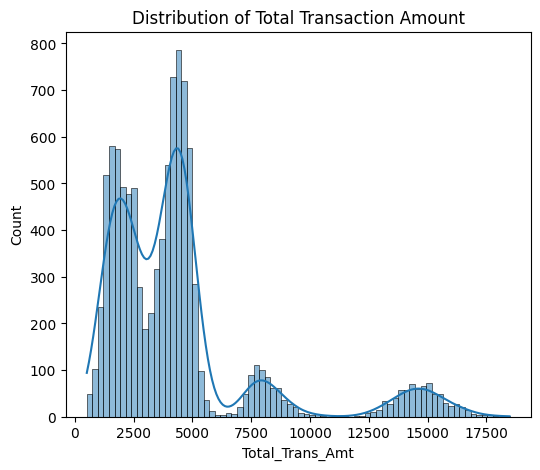

In [ ]:
# 1. How is the total transaction amount distributed?
plt.figure(figsize=(6, 5))
sns.histplot(data=data, x='Total_Trans_Amt', kde=True)
plt.title('Distribution of Total Transaction Amount')
plt.show()

**Total_Trans_Amt:**
- Right skewed
- 4 peaks at 2300, 4700, 7700, and 15000

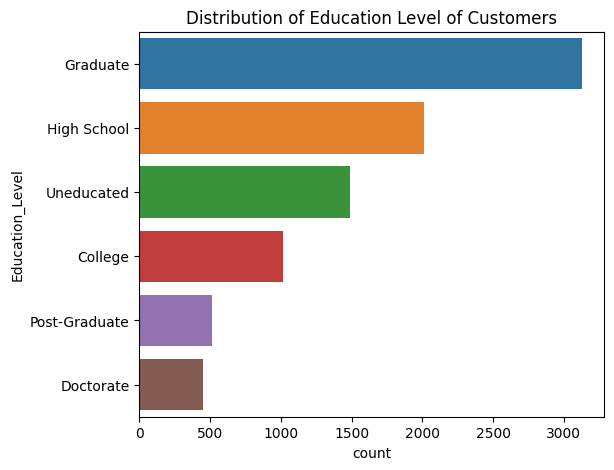

In [ ]:
# 2. What is the distribution of the level of education of customers?
plt.figure(figsize=(6, 5))
sns.countplot(data=data, y='Education_Level', order=data['Education_Level'].value_counts().index)
plt.title('Distribution of Education Level of Customers')
plt.show()

**Education_Level:**
- Graduate is the majority followed by High School, Uneducated, College, Post-Grad, and finallay Docorate.

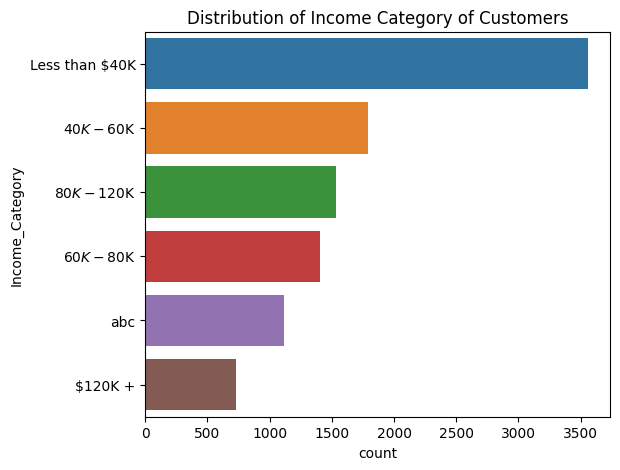

In [ ]:
# 3. What is the distribution of the level of income of customers?
plt.figure(figsize=(6, 5))
sns.countplot(data=data, y='Income_Category', order=data['Income_Category'].value_counts().index)
plt.title('Distribution of Income Category of Customers')
plt.show()

**Income_Category:**
- Majority is less than 40K
- 40 - 60K and 80- 120K are fairly equal
- Above 120k has the least clients
- 'abc' is a random income_catagory that we will replace using mode.

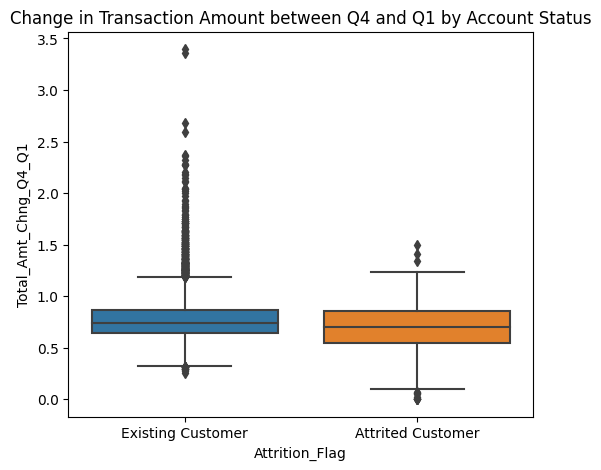

In [ ]:
# 4. How does the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1)
#    vary by the customer's account status (Attrition_Flag)?
plt.figure(figsize=(6, 5))
sns.boxplot(data=data, x='Attrition_Flag', y='Total_Amt_Chng_Q4_Q1')
plt.title('Change in Transaction Amount between Q4 and Q1 by Account Status')
plt.show()

**Total_Amt_Chng_Q4_Q1:**
- The change is transaction amount between Q4 & Q1 by account status is virtually the same with existing customers having many more upper outliers and attrited customes have more lower outliers.  The outliers however don't seem abnormal for in the context of this data.

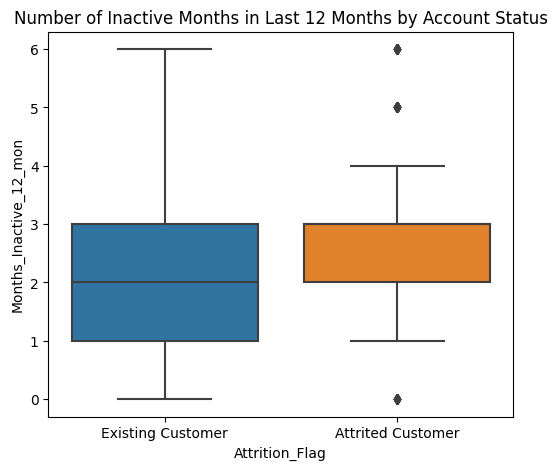

In [ ]:
# 5. How does the number of months a customer was inactive in the last 12 months
#   (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)?
plt.figure(figsize=(6, 5))
sns.boxplot(data=data, x='Attrition_Flag', y='Months_Inactive_12_mon')
plt.title('Number of Inactive Months in Last 12 Months by Account Status')
plt.show()

**Months_Inactive_12_mon:**
- Existing customers exhibit a broader range of inactive months (1 -3 months) vs attrited customers (2 - 3 months).
- Attrited customers show both upper and lower outliers but again they are acceptable in the context of this data.

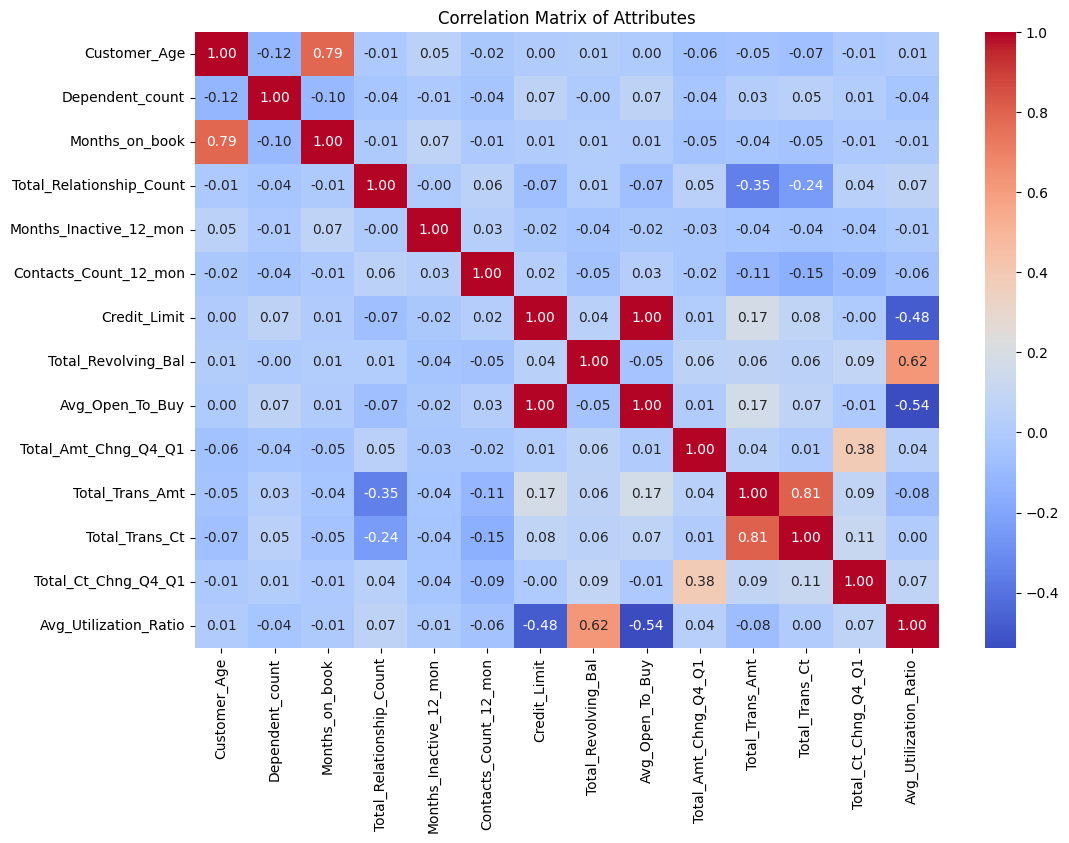

In [ ]:
# 6. What are the attributes that have a strong correlation with each other?
corr_matrix = data.corr()

# Plot a heatmap of the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix of Attributes')
plt.show()

**Correlation Analysis Commentary:**

- **Customer_Age vs. Months_on_book:** They have a high positive correlation of `0.788912`. This suggests that as customers age, their duration with the bank (`months on book`) also tends to increase. This is expected since older customers may have started their relationships with the bank earlier.

- **Total_Relationship_Count vs. Total_Trans_Amt, Total_Trans_Ct:** The negative correlations (`-0.347229` and `-0.241891` respectively) indicate that customers with more products or services with the bank might have fewer transactions and lesser transaction amounts.

- **Credit_Limit vs. Avg_Open_To_Buy:** An extremely high positive correlation of `0.995981`. This is expected as `Avg_Open_To_Buy` is calculated from the `Credit_Limit` minus the current amount the customer owes. The higher a customer's credit limit, the higher their average open to buy, assuming they don't utilize their entire limit.

- **Total_Revolving_Bal vs. Avg_Utilization_Ratio:** Positive correlation of `0.624022`, indicating that as the total revolving balance increases, the average utilization ratio also tends to increase. This makes sense because the utilization ratio measures the portion of a customer's available credit that they're using.

- **Total_Amt_Chng_Q4_Q1 vs. Total_Ct_Chng_Q4_Q1:** Positive correlation of `0.384189`, suggesting that customers who have a higher change in transaction amounts between Q4 and Q1 also tend to have a higher change in transaction counts during the same period.

- **Total_Trans_Amt vs. Total_Trans_Ct:** A high positive correlation of `0.807192`, which means that as the transaction amount increases, the number of transactions also increases. Customers who transact more frequently also tend to transact larger amounts.

- **Credit_Limit vs. Avg_Utilization_Ratio:** A negative correlation of `-0.482965` suggests that customers with higher credit limits tend to have a lower utilization ratio, implying they don't use up as much of their available credit as customers with lower limits.


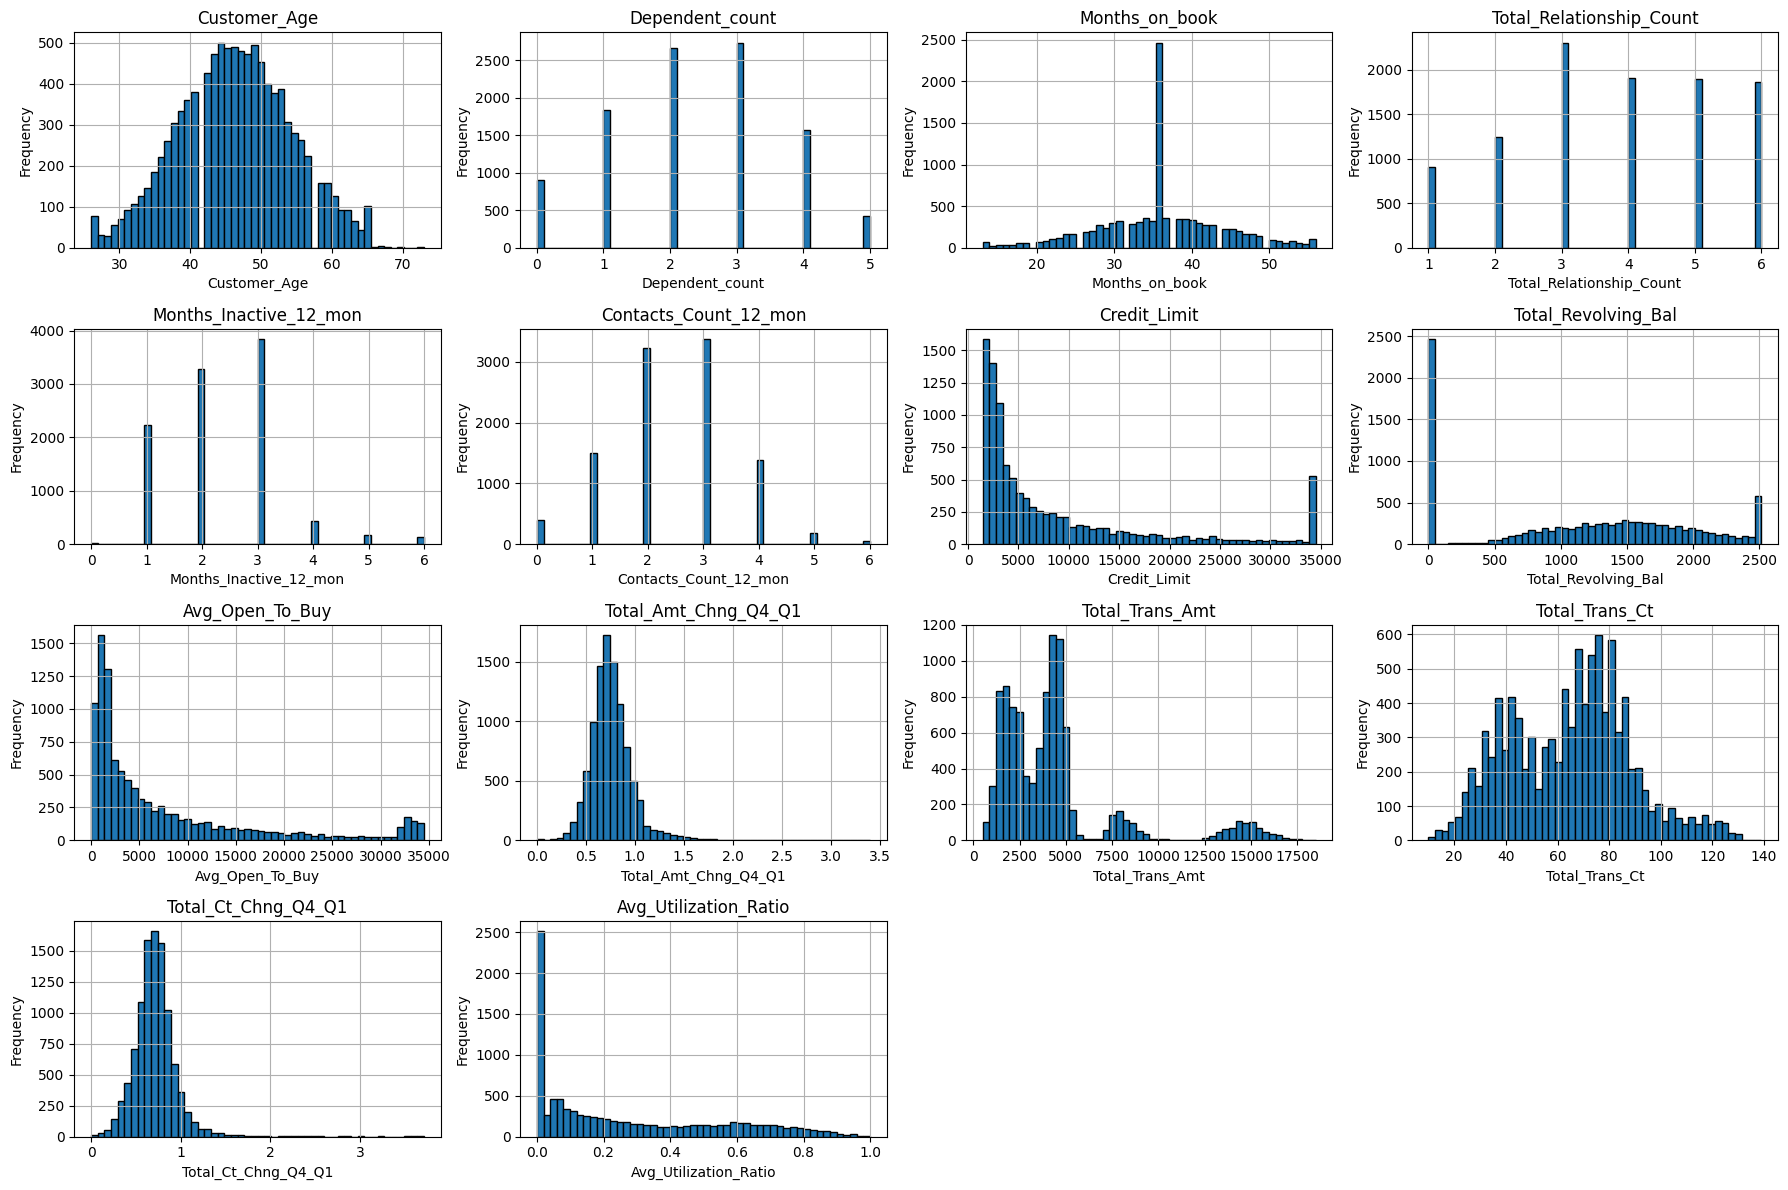

In [ ]:
# Plotting histograms for all numerical features
# Identifying numerical columns for outlier detection
numerical_columns = data.select_dtypes(exclude=['object']).columns.tolist()
plt.figure(figsize=(18, 12))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    data[column].hist(bins=50, edgecolor='black')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Histograms show various distribution patterns for all numerical features.  Nothing seems suspicious.**

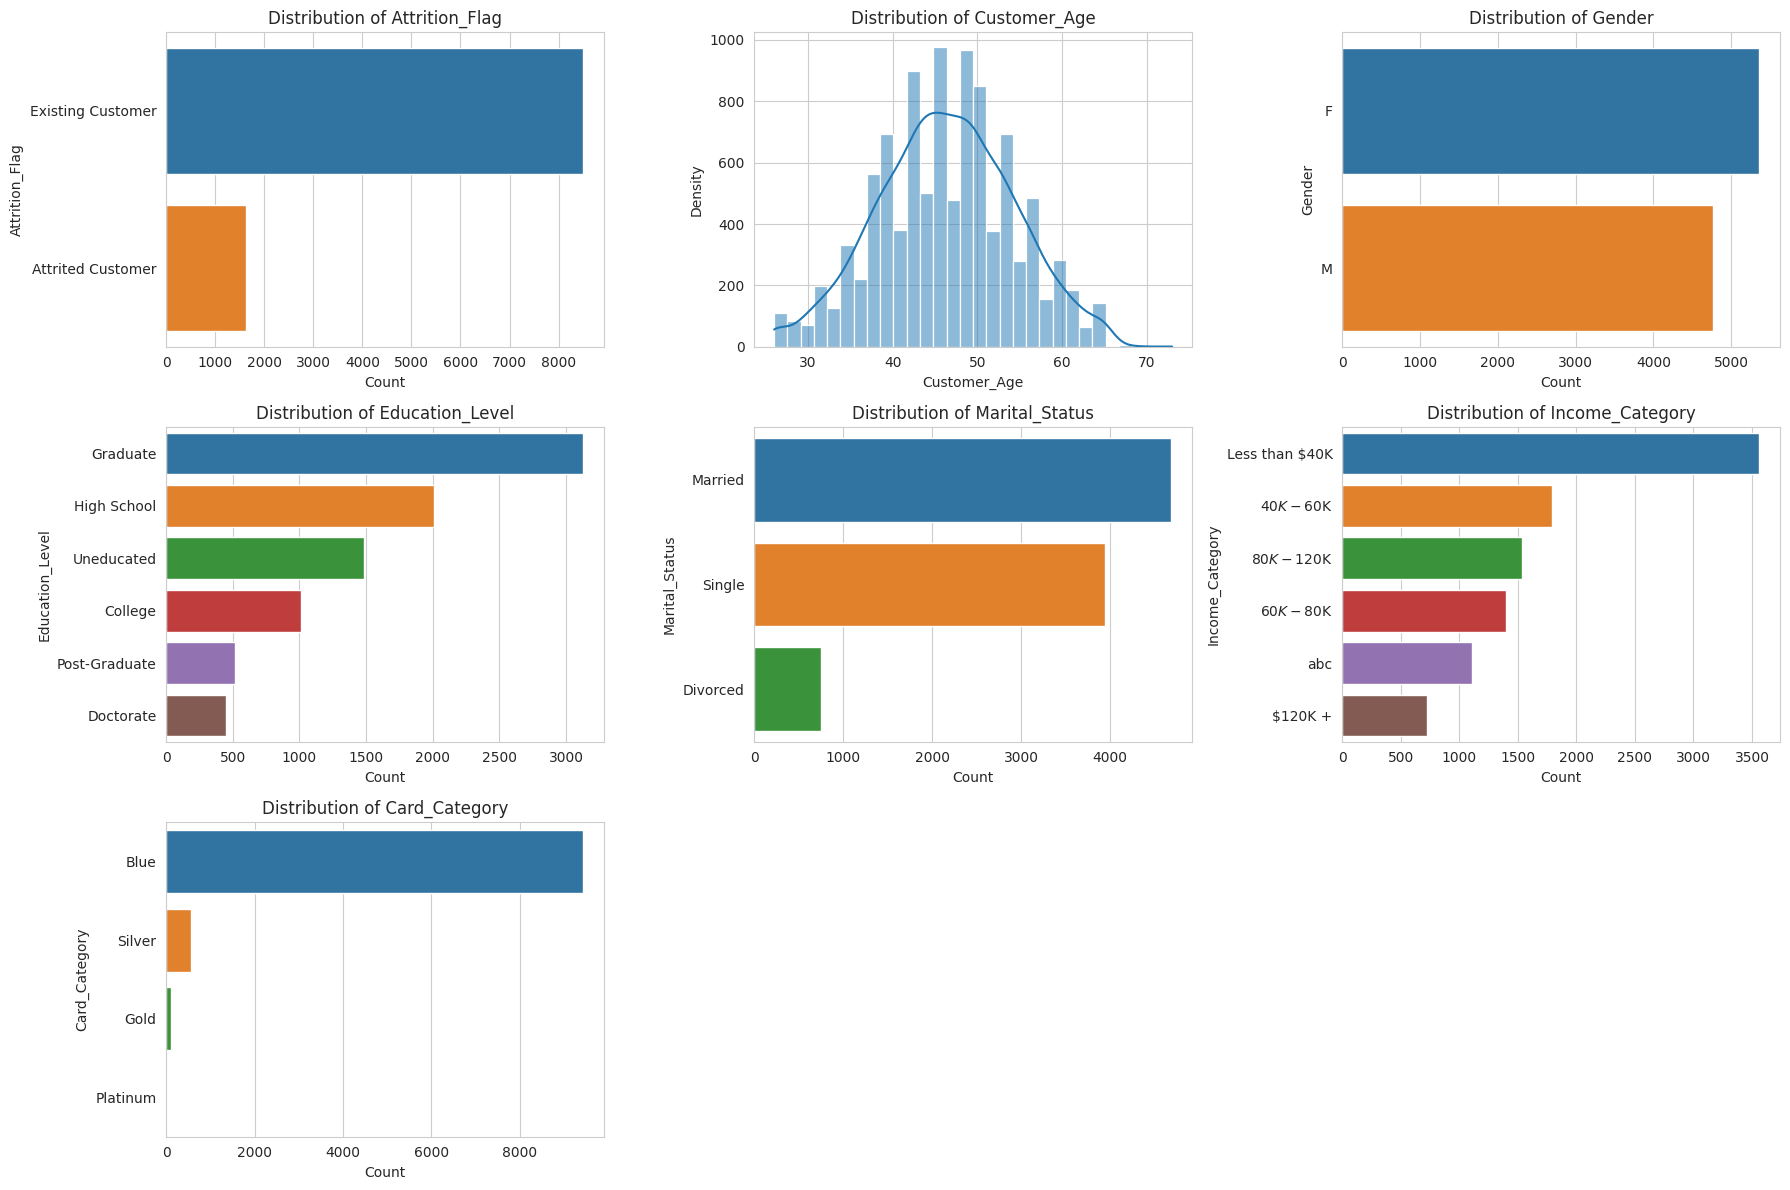

In [ ]:
# Set up the aesthetics for the plots
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(18, 12))

# List of columns for univariate analysis
columns = ['Attrition_Flag', 'Customer_Age', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Plotting the univariate distributions
for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    if data[column].dtype == 'O':  # if the variable is categorical
        sns.countplot(data=data, y=column, order = data[column].value_counts().index)
        plt.xlabel('Count')
        plt.ylabel(column)
        plt.title(f'Distribution of {column}')
    else:  # if the variable is numeric
        sns.histplot(data[column], bins=30, kde=True)
        plt.ylabel('Density')
        plt.xlabel(column)
        plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


## Oberservations on Univariate Distributions

**Attrition_Flag:**

- **Overview:** A large majority of customers are tagged as "Existing Customer", signifying their continued association with the bank. Nonetheless, a considerable portion is labeled "Attrited Customer", indicating their departure from the bank's services.
- **Implication:** This class imbalance may need attention during the model training phase to ensure accurate predictions.

**Customer_Age:**

- **Distribution:** Age seems to follow a near-normal distribution, albeit with a slight tilt towards the right. The age group predominantly falls between 40 and 60 years.

**Gender:**

- **Distribution:** Gender representation is almost equal, with females slightly outnumbering the males.

**Education_Level:**

- **Majority Degree:** The predominant education level is a graduate degree.
- **Secondary Degree:** High school qualification comes next.
- **Unknown Level:** A notable number of customers have an unspecified education level, which could result from missing data imputation or non-disclosure.

**Marital_Status:**

- **Overview:** A major share of customers are either married or single, while a smaller fraction identifies as divorced.

**Income_Category:**

- **Primary Income Group:** A significant segment earns less than \$40K annually.
- **Other Groups:** Other income brackets appear more balanced, with a smaller percentage earning \$120K or above.
- **Note about 'abc':** This is an obvious data input error so we will impute using Mode to replace all values of 'abc'.

**Card_Category:**

- **Dominant Category:** The "Blue" card is the prevailing choice among customers.
- **Other Categories:** Silver, Gold, and Platinum cards have a much smaller customer base in comparison.



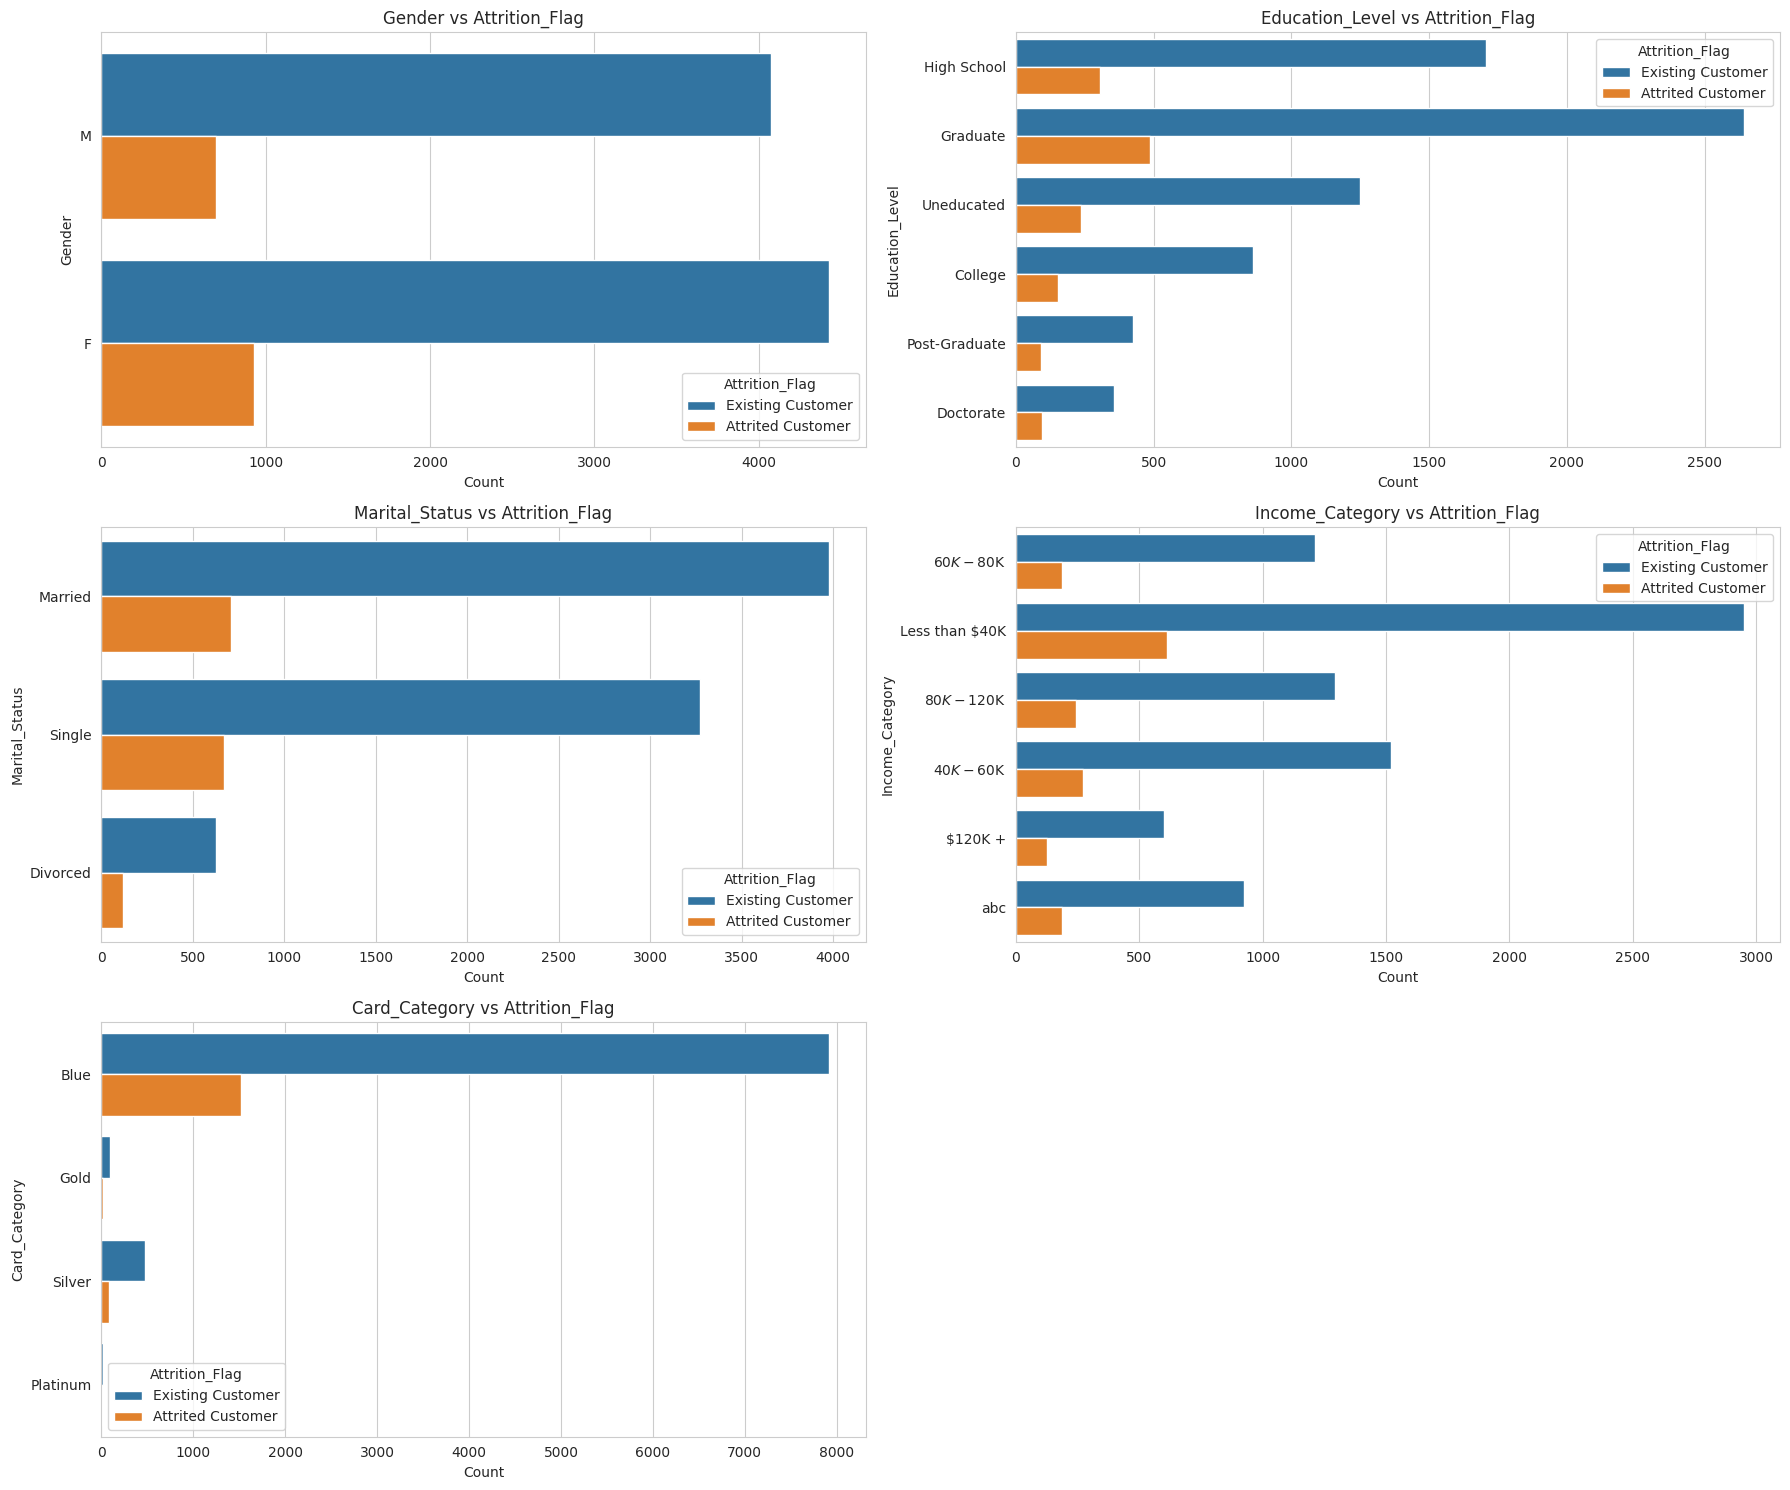

In [ ]:
# Bivariate Analysis: Relationship between target variable (Attrition_Flag) and other variables

plt.figure(figsize=(18, 15))

# Exploring relationships between 'Attrition_Flag' and some categorical variables
categorical_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=data, y=column, hue='Attrition_Flag')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.title(f'{column} vs Attrition_Flag')
    plt.legend(title='Attrition_Flag', loc='best')

plt.tight_layout()
plt.show()


## Analysis of Bivariate Distributions with Attrition_Flag

**Gender vs. Attrition_Flag:**

- **Overview:** Both genders demonstrate a similar trend in attrition, with a larger chunk being existing customers. Although there are more female customers, the attrition rate concerning the total appears analogous for both males and females.

**Education_Level vs. Attrition_Flag:**

- **Graduate Degree:** Those holding a graduate degree form the majority among existing customers and also among attrited ones.
- **Unknown Education:** A prominent proportion of attrited customers falls under the 'Unknown' education level. This could indicate a potential pattern or rationale for these unspecified values, or it might be purely incidental.

**Marital_Status vs. Attrition_Flag:**

- **Married Customers:** They are predominant in both existing and attrited classifications.
- **Single Customers:** They follow the married ones in count, but the attrition rate seems slightly elevated in comparison.

**Income_Category vs. Attrition_Flag:**

- **Less than $40K Income Group:** They are the majority in both the existing and attrited groups. Notably, the attrition ratio seems marginally elevated for this income bracket compared to others.

**Card_Category vs. Attrition_Flag:**

- **Blue Card Holders:** They constitute the majority, and this category also witnesses the highest number of attritions. However, in terms of proportion, other card types like "Silver" or "Gold" might display a similar or even marginally higher attrition rate.



# Data Pre-processing


## Missing value exploration




In [ ]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()

# Filtering out columns that have missing values
columns_with_missing_values = missing_values[missing_values > 0]

columns_with_missing_values

Education_Level    1519
Marital_Status      749
dtype: int64

**These missing values will be treated within our pipline using our MODE to fill in the values.**

##Outlier Exploration

In [ ]:
# Exploring the columns with outliers to determine the count of outliers
def display_outliers(data):
    numerical_columns = data.select_dtypes(include=[np.number]).columns
    outliers_info = {}

    for column in numerical_columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_count = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()

        outliers_info[column] = [outlier_count, data[column].min(), data[column].max()]

    outliers_df = pd.DataFrame.from_dict(outliers_info, orient='index', columns=["Number of Outliers", "Min Value", "Max Value"])

    return outliers_df

# Using the function:
outliers_result = display_outliers(data)
print(outliers_result)

                          Number of Outliers  Min Value  Max Value
Customer_Age                               2       26.0     73.000
Dependent_count                            0        0.0      5.000
Months_on_book                           386       13.0     56.000
Total_Relationship_Count                   0        1.0      6.000
Months_Inactive_12_mon                   331        0.0      6.000
Contacts_Count_12_mon                    629        0.0      6.000
Credit_Limit                             984     1438.3  34516.000
Total_Revolving_Bal                        0        0.0   2517.000
Avg_Open_To_Buy                          963        3.0  34516.000
Total_Amt_Chng_Q4_Q1                     396        0.0      3.397
Total_Trans_Amt                          896      510.0  18484.000
Total_Trans_Ct                             2       10.0    139.000
Total_Ct_Chng_Q4_Q1                      394        0.0      3.714
Avg_Utilization_Ratio                      0        0.0      0

**The outliers do not seem out of the ordinary for this dataset and thus will require no treatment.**

##Split the dataset into Train, Validation, and Testing sets prior to performing the preprocessing steps via a Pipeline

In [ ]:
# Splitting the data into train and a temporary set (combining validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(data.drop('Attrition_Flag', axis=1), data['Attrition_Flag'],
                                                    test_size=0.3, random_state=42, stratify=data['Attrition_Flag'])

# Splitting the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42,
                                                stratify=y_temp)

# Encoding the Attrition_Flag target variable since it is a string.
y_train = y_train.replace({'Attrited Customer': 1, 'Existing Customer': 0})
y_val = y_val.replace({'Attrited Customer': 1, 'Existing Customer': 0})
y_test = y_test.replace({'Attrited Customer': 1, 'Existing Customer': 0})

X_train.shape, X_val.shape, X_test.shape

((7088, 19), (1519, 19), (1520, 19))

##Building a Pipeline to Preprocess and transform the data for Train, Validation, and Test sets (This approach should ensure no data leakage).

In [ ]:
# Define a class to impute the 'abc' values to MODE in Income_Category
class CustomImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        self.mode_ = X['Income_Category'].mode()[0]
        return self

    def transform(self, X):
        X = X.copy()
        X['Income_Category'] = X['Income_Category'].replace('abc', self.mode_)
        return X

# Define numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Attrition_Flag')

# Define transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('custom_imputer', CustomImputer()),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocess = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fit the preprocessing pipeline on the training data
preprocess.fit(X_train)

# Transform datasets using the fitted pipeline
X_train_transformed = preprocess.transform(X_train)
X_val_transformed = preprocess.transform(X_val)
X_test_transformed = preprocess.transform(X_test)

#Model building

##Build a set of models from logistic regression, decision trees, bagging and boosting methods.  A total of 18 models will be built using the following critera:
1. **Build 6 Base models (Named: *Model Name Base*)**
2. **Build 6 Oversampled Models (Named: *Model Name OS*)**
3. **Build 6 Undersampled Models (Named: *Model Name US*)**

**Choose metric of interest- We are choosing F1 Score as our primary metric**

In [ ]:
# Define classifiers for all 18 models. Notice the naming conventions with Model Type (Base, OS, US) as a suffix of each model name
classifiers_sets = {
    "Base Models": {
        "Logistic Regression Base": LogisticRegression(max_iter=5000, random_state=42),
        "Decision Tree Base": DecisionTreeClassifier(random_state=42),
        "Random Forest Base": RandomForestClassifier(random_state=42),
        "Bagging with LR Base": BaggingClassifier(base_estimator=LogisticRegression(max_iter=5000), n_estimators=10, random_state=42),
        "Gradient Boosting Base": GradientBoostingClassifier(random_state=42),
        "XGBoost Base": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    },
    "Oversampled Models": {
        "Logistic Regression OS": LogisticRegression(max_iter=1000, random_state=42),
        "Decision Tree OS": DecisionTreeClassifier(random_state=42),
        "Random Forest OS": RandomForestClassifier(random_state=42),
        "Bagging with LR OS": BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000), random_state=42),
        "Gradient Boosting OS": GradientBoostingClassifier(random_state=42),
        "XGBoost OS": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    },
    "Undersampled Models": {
        "Logistic Regression US": LogisticRegression(max_iter=1000, random_state=42),
        "Decision Tree US": DecisionTreeClassifier(random_state=42),
        "Random Forest US": RandomForestClassifier(random_state=42),
        "Bagging with LR US": BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000), random_state=42),
        "Gradient Boosting US": GradientBoostingClassifier(random_state=42),
        "XGBoost US": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    }
}

# Helper function to train and evaluate each model.
def train_and_evaluate(X_train, y_train, X_val, classifiers):
    metrics = []
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_val_pred = clf.predict(X_val_transformed) #Note the transformed validation data is used here

        f1 = f1_score(y_val, y_val_pred)
        recall = recall_score(y_val, y_val_pred)
        precision = precision_score(y_val, y_val_pred)

        metrics.append({
            "Model name": name,
            "F1 Score": f1,
            "Recall": recall,
            "Precision": precision
        })

    return pd.DataFrame(metrics)

all_metrics = []


# Base models
base_metrics = train_and_evaluate(X_train_transformed, y_train, X_val_transformed, classifiers_sets["Base Models"])
all_metrics.append(base_metrics)

# Oversampled models using SMOTE
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_transformed, y_train)
oversampled_metrics = train_and_evaluate(X_train_oversampled, y_train_oversampled, X_val_transformed, classifiers_sets["Oversampled Models"])
all_metrics.append(oversampled_metrics)

# Undersampled models using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train_transformed, y_train)
undersampled_metrics = train_and_evaluate(X_train_undersampled, y_train_undersampled, X_val_transformed, classifiers_sets["Undersampled Models"])
all_metrics.append(undersampled_metrics)

# define a function to help with formatting the metric output
def format_metrics(metrics_df):
    metrics_df["F1 Score"] = metrics_df["F1 Score"].apply(lambda x: "{:.2f}%".format(x * 100))
    metrics_df["Recall"] = metrics_df["Recall"].apply(lambda x: "{:.2f}%".format(x * 100))
    metrics_df["Precision"] = metrics_df["Precision"].apply(lambda x: "{:.2f}%".format(x * 100))
    return metrics_df

# Combine all the metrics DataFrames
final_metrics = pd.concat(all_metrics, ignore_index=True)

# Sort by F1 Score for clarity
final_metrics = final_metrics.sort_values(by="F1 Score", ascending=False)

# Format metrics
formatted_metrics = format_metrics(final_metrics)

print('----Metrics on All 18 Models Sorted by Highest F1 Score----\n')
print(formatted_metrics)

----Metrics on All 18 Models Sorted by Highest F1 Score----

                  Model name F1 Score  Recall Precision
5               XGBoost Base   90.53%  88.11%    93.07%
11                XGBoost OS   90.00%  88.52%    91.53%
17                XGBoost US   85.82%  94.26%    78.77%
10      Gradient Boosting OS   85.77%  86.48%    85.08%
4     Gradient Boosting Base   85.52%  78.69%    93.66%
8           Random Forest OS   84.32%  81.56%    87.28%
16      Gradient Boosting US   83.76%  93.03%    76.17%
14          Random Forest US   81.68%  91.39%    73.84%
2         Random Forest Base   80.00%  72.13%    89.80%
1         Decision Tree Base   79.32%  76.23%    82.67%
7           Decision Tree OS   75.15%  78.69%    71.91%
13          Decision Tree US   71.38%  86.89%    60.57%
0   Logistic Regression Base   61.93%  55.33%    70.31%
3       Bagging with LR Base   61.93%  55.33%    70.31%
6     Logistic Regression OS   61.88%  79.51%    50.65%
9         Bagging with LR OS   61.39%  79.5

#Using Hyperparameters to tune Top 3 models using RandomSearchCV
- **Choose models that might perform better after tuning (tune at least 3 models out of 18 built in the previous steps)**
- **Provide proper reasoning for tuning that model**
- **Tune the best 3 models obtained above using randomized search and metric of interest**
- **Check the performance of 3 tuned models**

#We are choosing these 3 Models
1. **XGBoost Base**
2. **Gradient Boosting OS**
3. **Random Forest OS**

### **Reasoning for Tuning:**
**XGBoost Base**, **Random Forest OS**, and **Gradient Boosting OS** are chosen for tuning due to their inherent power and versatility in handling complex datasets. XGBoost's vast range of parameters and built-in regularization offer robust performance potential. Random Forest, an ensemble model, provides consistency and can be significantly enhanced through parameter optimization. Gradient Boosting, with its sequential tree-building approach, has key parameters like learning rate and tree depth that can dramatically influence results.

While other models have their merits, these three consistently demonstrate higher performance ceilings and broader adaptability, making them prime candidates for hyperparameter tuning.

In [ ]:
# Create a function to compute metrics for a model
def compute_metrics(model, X, y, model_name):
    predictions = model.predict(X)
    f1 = f1_score(y, predictions)
    recall = recall_score(y, predictions)
    precision = precision_score(y, predictions)

    return pd.DataFrame({
        "Model name": [model_name],
        "F1 Score": [f1],
        "Recall": [recall],
        "Precision": [precision]
    })

In [ ]:
# Tuning the 3 models
# Hyperparameters grid for RandomForest (Parameters recommended in project assignment)
rf_params = {
    "randomforestclassifier__n_estimators": [200,250,300],
    "randomforestclassifier__min_samples_leaf": np.arange(1, 4),
    "randomforestclassifier__max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "randomforestclassifier__max_samples": np.arange(0.4, 0.7, 0.1)
}

# Using a pipeline for RF
rf_pipeline = make_pipeline(preprocess, RandomForestClassifier(random_state=42))

# RandomSearchCV for RF
rf_search = RandomizedSearchCV(rf_pipeline, param_distributions=rf_params, n_iter=100, cv=5, verbose=2, n_jobs=-1, scoring='f1')
rf_search.fit(X_train, y_train)

# Hyperparameters grid for GradientBoosting (Parameters recommended in project assignment)
gb_params = {
    "gradientboostingclassifier__init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "gradientboostingclassifier__n_estimators": np.arange(75,150,25),
    "gradientboostingclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "gradientboostingclassifier__subsample": [0.5,0.7,1],
    "gradientboostingclassifier__max_features": [0.5,0.7,1]
}

# Using a pipeline for GB
gb_pipeline = make_pipeline(preprocess, GradientBoostingClassifier(random_state=42))

# RandomSearchCV for GB
gb_search = RandomizedSearchCV(gb_pipeline, param_distributions=gb_params, n_iter=100, cv=5, verbose=2, n_jobs=-1, scoring='f1')
gb_search.fit(X_train, y_train)

# Hyperparameters grid for XGBoost (Parameters recommended in project assignment)
xgb_params = {
    'xgbclassifier__n_estimators': np.arange(50,300,50),
    'xgbclassifier__scale_pos_weight': [0,1,2,5,10],
    'xgbclassifier__learning_rate': [0.01,0.1,0.2,0.05],
    'xgbclassifier__gamma': [0,1,3,5],
    'xgbclassifier__subsample': [0.7,0.8,0.9,1]
}

# Using a pipeline for XGB
xgb_pipeline = make_pipeline(preprocess, xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))

# RandomSearchCV for XGB
xgb_search = RandomizedSearchCV(xgb_pipeline, param_distributions=xgb_params, n_iter=100, cv=5, verbose=2, n_jobs=-1, scoring='f1')
xgb_search.fit(X_train, y_train)

# Compute metrics for each model
rf_metrics = compute_metrics(rf_search.best_estimator_, X_val, y_val, "Random Forest OS")
gb_metrics = compute_metrics(gb_search.best_estimator_, X_val, y_val, "Gradient Boosting OS")
xgb_metrics = compute_metrics(xgb_search.best_estimator_, X_val, y_val, "XGBoost Base")

# Concatenate metrics DataFrames
all_metrics = pd.concat([xgb_metrics, gb_metrics, rf_metrics], axis=0)

# Sort and print
all_metrics = all_metrics.sort_values(by='F1 Score', ascending=False)
print("\n----- Performance Metrics on the TUNED Models.-----")
print(all_metrics)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits

----- Performance Metrics on the TUNED Models.-----
             Model name  F1 Score    Recall  Precision
0          XGBoost Base  0.905051  0.918033   0.892430
0  Gradient Boosting OS  0.893162  0.856557   0.933036
0      Random Forest OS  0.785047  0.688525   0.913043


**The metrics shown above display the comparison of the 3 tuned models.**

## Model evaluation criterion
**We will be evaluating the 3 model's performance on the Test Data and using F1 Score as our Metric of Interest**

## Model Performances
- **Compare the model performance of tuned models - Choose the best model**

In [ ]:
# Define functions to evaluate the models and show confusion matrix
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):

    # Predictions
    test_preds = model.predict(X_test)

    # Test metrics
    f1 = f1_score(y_test, test_preds)
    recall = recall_score(y_test, test_preds)
    precision = precision_score(y_test, test_preds)

    # Create a DataFrame
    metrics_df = pd.DataFrame({
        "Model name": [model_name],
        "F1 Score": [f1],
        "Recall": [recall],
        "Precision": [precision]
    })

    return metrics_df

def show_confusion_matrix(model, X_test, y_test, figsize=(6, 4)):

  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)

  plt.figure(figsize=figsize)
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title('Confusion Matrix')
  plt.colorbar()

  classes = np.unique(y_test)
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          plt.text(j, i, cm[i, j],
                   horizontalalignment="center",
                   color="white" if cm[i, j] > cm.max() / 2 else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

# Call the function and concatenate results for all 3 tuned models
rf_metrics = evaluate_model(rf_search.best_estimator_, X_train, y_train, X_test, y_test, "Random Forest OS")
gb_metrics = evaluate_model(gb_search.best_estimator_, X_train, y_train, X_test, y_test, "Gradient Boosting OS")
xgb_metrics = evaluate_model(xgb_search.best_estimator_, X_train, y_train, X_test, y_test, "XGBoost Base")

-------Metrics for Random Forest Model:-------
         Model name  F1 Score    Recall  Precision
0  Random Forest OS  0.844037  0.754098   0.958333

Confusion Matrix for Random Forest Model:


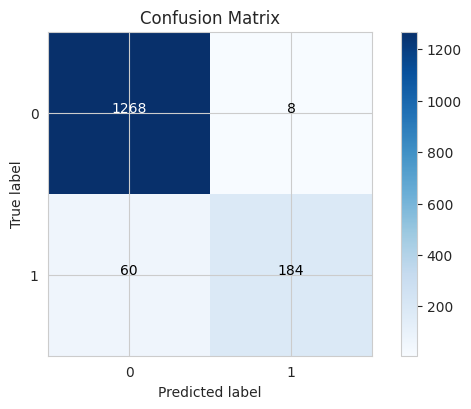

-------Metrics for Gradient Boosting Model:-------
             Model name  F1 Score    Recall  Precision
0  Gradient Boosting OS  0.918239  0.897541   0.939914

Confusion Matrix for Gradient Boosting Model:


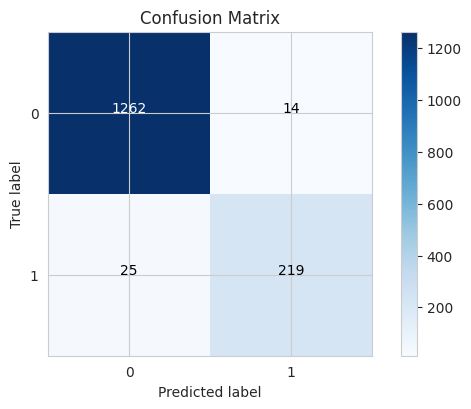

-------Metrics for XGBoost Model:-------
     Model name  F1 Score    Recall  Precision
0  XGBoost Base  0.898204  0.922131   0.875486

Confusion Matrix for XGBoost Model:


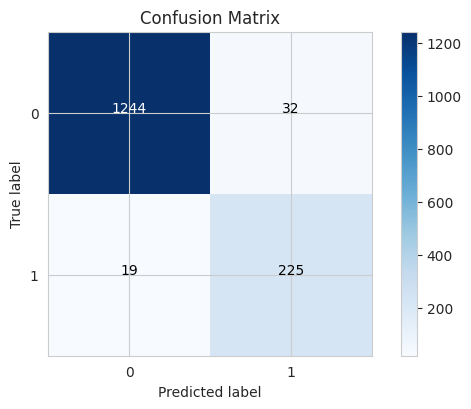


----- Performance Metrics on the TUNED Models.-----
             Model name  F1 Score    Recall  Precision
2          XGBoost Base  0.898204  0.922131   0.875486
1  Gradient Boosting OS  0.918239  0.897541   0.939914
0      Random Forest OS  0.844037  0.754098   0.958333


In [ ]:
# Run the evaluate_model function on each model, show it's confusion matrix, and print the metrics for each

# For Random Forest
print("-------Metrics for Random Forest Model:-------")
rf_metrics = evaluate_model(rf_search.best_estimator_, X_train, y_train, X_test, y_test, "Random Forest OS")
print(rf_metrics)
print("\nConfusion Matrix for Random Forest Model:")
show_confusion_matrix(rf_search.best_estimator_, X_test, y_test)

# For Gradient Boosting
print("-------Metrics for Gradient Boosting Model:-------")
gb_metrics = evaluate_model(gb_search.best_estimator_, X_train, y_train, X_test, y_test, "Gradient Boosting OS")
print(gb_metrics)
print("\nConfusion Matrix for Gradient Boosting Model:")
show_confusion_matrix(gb_search.best_estimator_, X_test, y_test)

# For XGBoost
print("-------Metrics for XGBoost Model:-------")
xgb_metrics = evaluate_model(xgb_search.best_estimator_, X_train, y_train, X_test, y_test, "XGBoost Base")
print(xgb_metrics)
print("\nConfusion Matrix for XGBoost Model:")
show_confusion_matrix(xgb_search.best_estimator_, X_test, y_test)

all_metrics = pd.concat([rf_metrics, gb_metrics, xgb_metrics]).reset_index(drop=True)
all_metrics = all_metrics.sort_values(by='Recall', ascending=False)
print("\n----- Performance Metrics on the TUNED Models.-----")
print(all_metrics)



## Insights into Final Model Selection:

1. **Customer Churn Focus:** The bank's primary objective is to predict customer churn accurately. Recall for the positive class (churn) becomes the most important metric. **XGBoost Base** has the highest Recall (92.2%) and a strong F1 Score (89.8%).
2. **Performance by Recall:** XGBoost Base > Gradient Boosting OS > Random Forest OS. **XGBoost Base** captures approximately 92.2% of customers who are likely to churn, the best among the three.
3. **Precision and Business Impact:** A lower precision might be acceptable for a significant gain in recall, given the costs associated with losing a customer.
4. **Choice for Churn Prediction:** XGBoost is the best model given the high importance of recall for this context.
5. **False Negatives vs False Positives:** XGBoost has the least false negatives at 19, which is desirable for the bank.

##**Final Model Chosen is XGBOOST Base**

## Recommendations and Further Insights for Thera Bank for this model:

1. **Model Implementation:** Use the XGBoost model to predict potential churn and target these customers with retention strategies.
2. **Model Evaluation in Real Time:** Continuously evaluate the model on new data to adapt to changing patterns of churn.
3. **Feature Importance:** Understand the primary drivers of churn to focus resources on significant problem areas.
4. **Customer Segmentation:** Segment customers based on their likelihood to churn and their value to the bank.
5. **Feedback Loop:** Encourage high-risk churn customers to provide feedback for more qualitative insights.
6. **Retention Strategies:** Introduce targeted retention strategies for likely-to-churn customers.
7. **Regular Model Updates:** Update the model regularly with fresh data to maintain its accuracy.


##Productionize the model
- **Create a final model using a pipeline**
- **We will create the XGBOOST Model using our pipeline then evaluate our model on our unseen Test Dataset, then print performance results**

In [ ]:
# Create the pipeline
xgb_pipeline = make_pipeline(preprocess, xgb.XGBClassifier())

# Train the pipeline on the training data
xgb_pipeline.fit(X_train, y_train)

# Predict using the pipeline using unseen test data
y_pred = xgb_pipeline.predict(X_test)

# Metrics calculation
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Create a DataFrame for metrics
df_metrics = pd.DataFrame({
    'Model name': ['XGBoost Base'],
    'F1 Score': [f1],
    'Recall': [recall],
    'Precision': [precision]
})

print("\n------- Metrics on the Final Model ----------")
print(df_metrics)


------- Metrics on the Final Model ----------
     Model name  F1 Score    Recall  Precision
0  XGBoost Base  0.901468  0.881148   0.922747


**As we can see by the F1 score of 90%, our XGBOOST Base Model did very well on the unseen Test dataset.**

**Let's look at the most imporant features accourding to our final model**


------- Feature Importances ----------
                           Feature  Importance
11                  Total_Trans_Ct    0.185706
7              Total_Revolving_Bal    0.165948
3         Total_Relationship_Count    0.125874
10                 Total_Trans_Amt    0.058389
12             Total_Ct_Chng_Q4_Q1    0.052256
4           Months_Inactive_12_mon    0.040893
0                     Customer_Age    0.039477
5            Contacts_Count_12_mon    0.038523
9             Total_Amt_Chng_Q4_Q1    0.034497
14                        Gender_F    0.029834
8                  Avg_Open_To_Buy    0.027432
16         Education_Level_College    0.017155
6                     Credit_Limit    0.016368
30              Card_Category_Blue    0.016244
23          Marital_Status_Married    0.014904
24           Marital_Status_Single    0.014400
2                   Months_on_book    0.014302
20   Education_Level_Post-Graduate    0.013126
27     Income_Category_$60K - $80K    0.012528
13           Avg_Uti

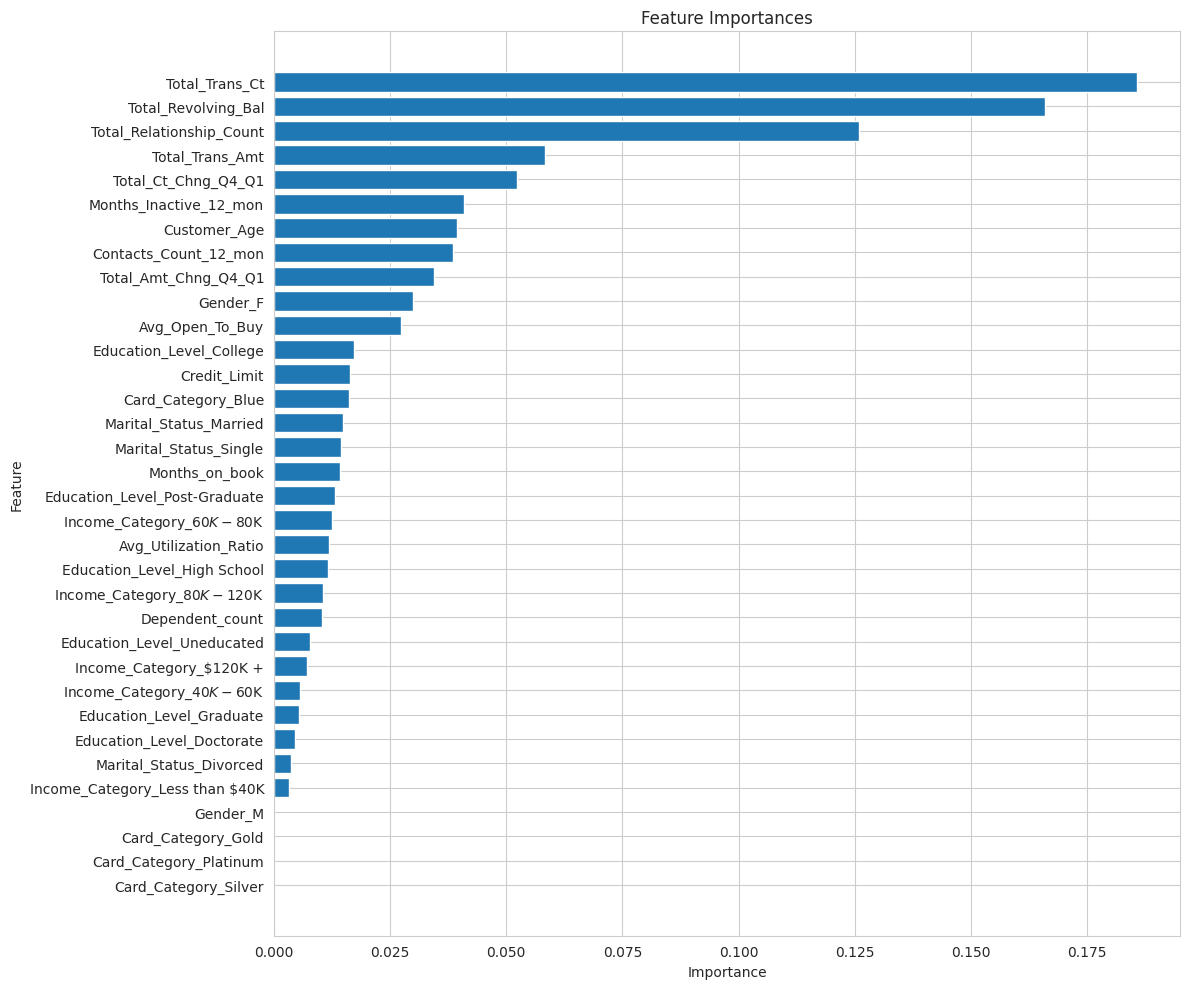

In [ ]:
# 1. Extract the trained XGBClassifier model from the pipeline
model = xgb_pipeline.named_steps['xgbclassifier']

# 2. Get the feature importances from the model
importances = model.feature_importances_

# 3. Get the transformed feature names
# Extract transformed names from the one-hot encoder in the categorical transformer
ohe_feature_names = (preprocess.named_transformers_['cat']
                     .named_steps['onehot']
                     .get_feature_names_out(categorical_cols))

# Combine the original numerical columns with the transformed categorical columns
transformed_feature_names = numerical_cols + list(ohe_feature_names)

# 4. Create a DataFrame to display the importances with the respective feature names
feature_importance_df = pd.DataFrame({
    'Feature': transformed_feature_names,
    'Importance': importances
})

# Sorting the dataframe based on importance values
sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\n------- Feature Importances ----------")
print(sorted_feature_importance)

# Plot
plt.figure(figsize=(12, 10))
plt.barh(sorted_feature_importance['Feature'], sorted_feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # This will display the feature with the highest importance on top
plt.tight_layout()  # Ensures that the full feature names and ticks are visible in the plot
plt.show()

# Thera Bank: Actionable Insights and Recommendations

## 1. Customer Engagement:
**Insight:** The total transaction count (`Total_Trans_Ct`) and amount (`Total_Trans_Amt`) are among the most influential features. Moreover, the number of contacts with the customer in the last 12 months (`Contacts_Count_12_mon`) and the number of months a customer was inactive (`Months_Inactive_12_mon`) were also significant.

**Recommendation:** Engage with customers regularly through personalized offers, reminders, and loyalty programs. A proactive approach, especially for customers showing signs of reduced activity, can help retain them.

## 2. Credit Card Utility:
**Insight:** Features like `Total_Revolving_Bal`, `Avg_Utilization_Ratio`, and `Credit_Limit` played a crucial role in the model, highlighting the importance of how customers utilize their credit limits.

**Recommendation:** Offer credit limit increases to customers who consistently use a significant portion of their available credit without defaulting. This can incentivize them to use the bank's credit card more often.

## 3. Product Holding and Relationship:
**Insight:** `Total_Relationship_Count`, indicating the total number of products held by a customer, emerged as a key feature.

**Recommendation:** Introduce bundled offers or packages where holding multiple products (e.g., savings account, credit card, mortgage) provides the customer with certain benefits. This approach not only increases the bank's product penetration but also binds customers tighter to the bank, reducing the chances of churn.

## 4. Demographics:
**Insight:** Features related to `Education_Level`, `Income_Category`, and `Marital_Status` were influential in our model, even if they weren't the top drivers.

**Recommendation:** Design targeted marketing campaigns based on these demographic factors. For example, premium card offers can be directed towards the higher income categories, while educational loan offers might resonate with those categorized as 'college' in the education level.

## 5. Regular Monitoring and Model Updates:
**Insight:** The model's performance can drift over time, given shifts in customer behaviors, economic conditions, and other dynamic factors.

**Recommendation:** Ensure regular monitoring of the model's performance and consider retraining with updated data. This will keep the model relevant and maintain its predictive accuracy.

## 6. Address Class Imbalance in Future Modeling:
**Insight:** The dataset presented a class imbalance, which could bias the model's performance, particularly when predicting the minority class (i.e., churning customers).

**Recommendation:** The bank should gather more data on churned customers to organically balance the dataset.

## 7. Feedback Mechanism:
**Recommendation:** Roll out a feedback mechanism for churned customers to ascertain the main reasons for their exit. This qualitative data can offer valuable insights that quantitative metrics might overlook, aiding in the refinement of retention strategies.
